In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image1 = cv2.imread('books1.jpeg')
image2 = cv2.imread('books2.jpeg')

In [3]:
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image1_gray = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)


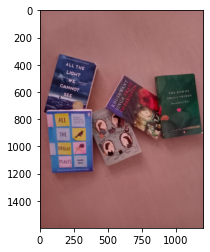

In [4]:
plt.figure()              
plt.imshow(image1)

In [5]:
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image2_gray = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)


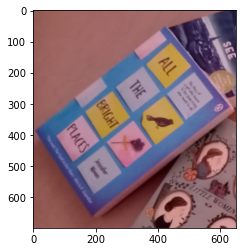

In [6]:
plt.figure()              
plt.imshow(image2)

In [7]:
sift = cv2.SIFT_create()

<SIFT 000002AEE072F7B0>


In [8]:
train_keypoints, train_descriptor = sift.detectAndCompute(image1_gray, None)

In [9]:
test_keypoints, test_descriptor = sift.detectAndCompute(image2_gray, None)

In [10]:
draw = cv2.drawKeypoints(image1, train_keypoints, image1, color = (0, 255, 0))

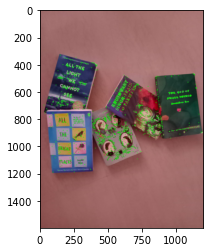

In [11]:
plt.figure()              
plt.imshow(image1)

In [12]:
bf = cv2.BFMatcher()
matches = bf.knnMatch (train_descriptor, test_descriptor,k=2)

In [13]:
good_matches = []
for m1, m2 in matches:
    if m1.distance < 0.6*m2.distance:
        good_matches.append([m1])

In [14]:
len(good_matches)

303

In [15]:
result = cv2.drawMatchesKnn(image1, train_keypoints, image2, test_keypoints, good_matches, None, flags = 2)

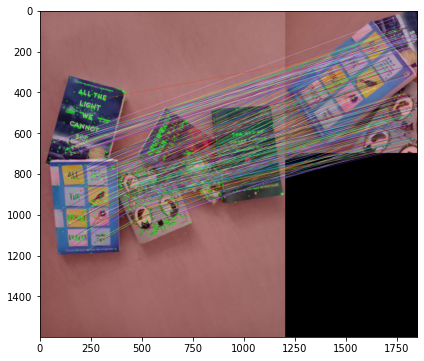

In [16]:
plt.figure(figsize=(10,6))              
plt.imshow(result)